# **Import Libraries**

In [2]:
# MNE 
import mne

# Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
np.random.seed(42)

In [3]:
import sys

sys.path.append('../')

from module.models import FFT_CNNModel, CNNModel
from module.utilities import read_xdf, epoching

# **Load Data**

In [4]:
FFT_CNN = FFT_CNNModel(input_channels=3, input_size=626)

Loaded pretrained FFT_CNNModel.h5


In [5]:
annotations_des = {
    '1': 'Left cue start',
    '2': 'Left stimuli start',
    '3': 'Left blank start',
    '4': 'Right cue start',
    '5': 'Right stimuli start',
    '6': 'Right blank start',
}

In [6]:
def get_epoch(filenames):
    # Define temporal variables
    X, F, t, y = [],[],[],[]
    for filename in filenames:
        ##--------Get First 5 second--------##
        raw = read_xdf(filename, show_plot=False, show_psd=False, verbose=False)
        epochs = epoching(raw, show_psd=False,
            show_eeg=False,  # set True if wanna see preview of all epoch
            tmax=5)         # tmax=5 means set epoch duration 5 second
        # Pick only event 2: Left stimuli, 5: Right stimuli
        epochs = epochs['2','5']
        X.append((  epochs.get_data())[:,:,:1250]) # select only first 1250 frames(approx 5 second)
        F.append(   epochs.compute_psd(method='welch', fmax=30).get_data())
        t.append((  epochs.times)[:1250])                # select only first 1250 frames(approx 5 second)
        y.append(   epochs.events[:, -1])
        ##--------Get Last 5 second--------##
        epochs = epoching(raw, show_psd=False,
            show_eeg=False,  # set True if wanna see preview of all epoch
            baseline=(5,10),
            tmin=5,
            tmax=10)         # tmax=5 means set epoch duration 5 second
        # Pick only event 2: Left stimuli, 5: Right stimuli
        epochs = epochs['2','5']
        X.append((  epochs.get_data())[:,:,:1250]) # select only first 1250 frames(approx 5 second)
        F.append(   epochs.compute_psd(method='welch', fmax=30).get_data())
        t.append((  epochs.times)[:1250])                # select only first 1250 frames(approx 5 second)
        y.append(   epochs.events[:, -1])
    # Concatenate all data
    X = np.concatenate(X)
    F = np.concatenate(F)
    t = np.concatenate(t)
    y = np.concatenate(y)
    return X, F, t, y

In [7]:
day_text = '28_5_2023'
day_text_old = '18_5_2023'

## **6 Hz**

## **18_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=51160
    Range : 0 ... 51159 =      0.000 ...   204.541 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)


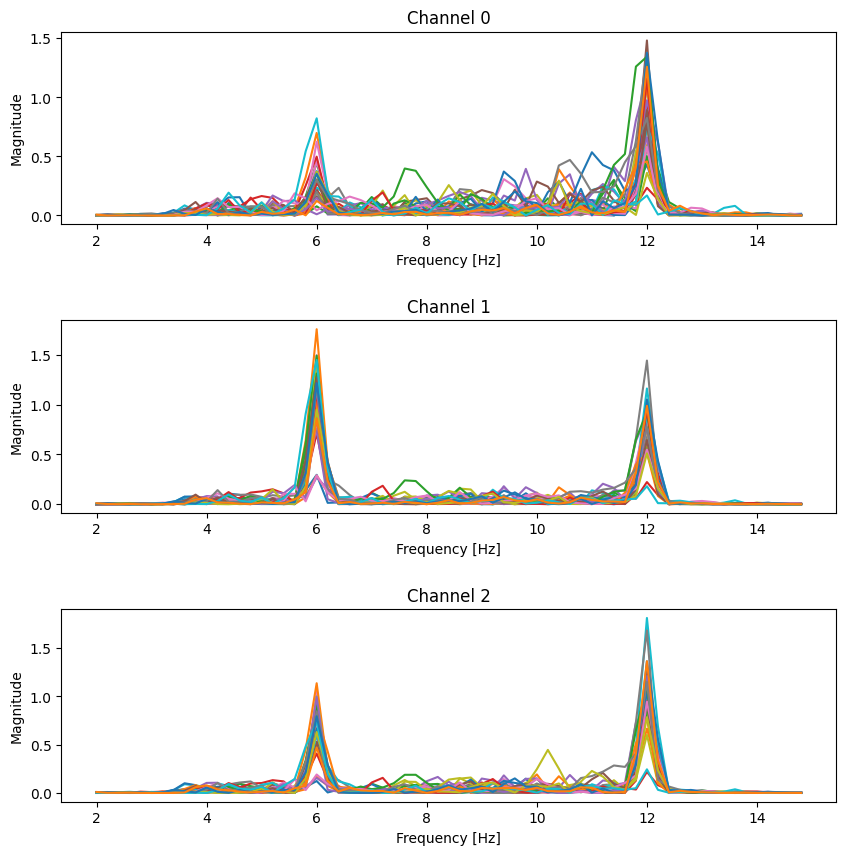

In [14]:
filenames = {f'../data/{day_text_old}/Pipo_6Hz.xdf'}

Xl, Fl, tl, yl = get_epoch(filenames)

FFT_CNN.fft_plot(Xl)

## **28_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=51400
    Range : 0 ... 51399 =      0.000 ...   205.485 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.023 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.023 (s)


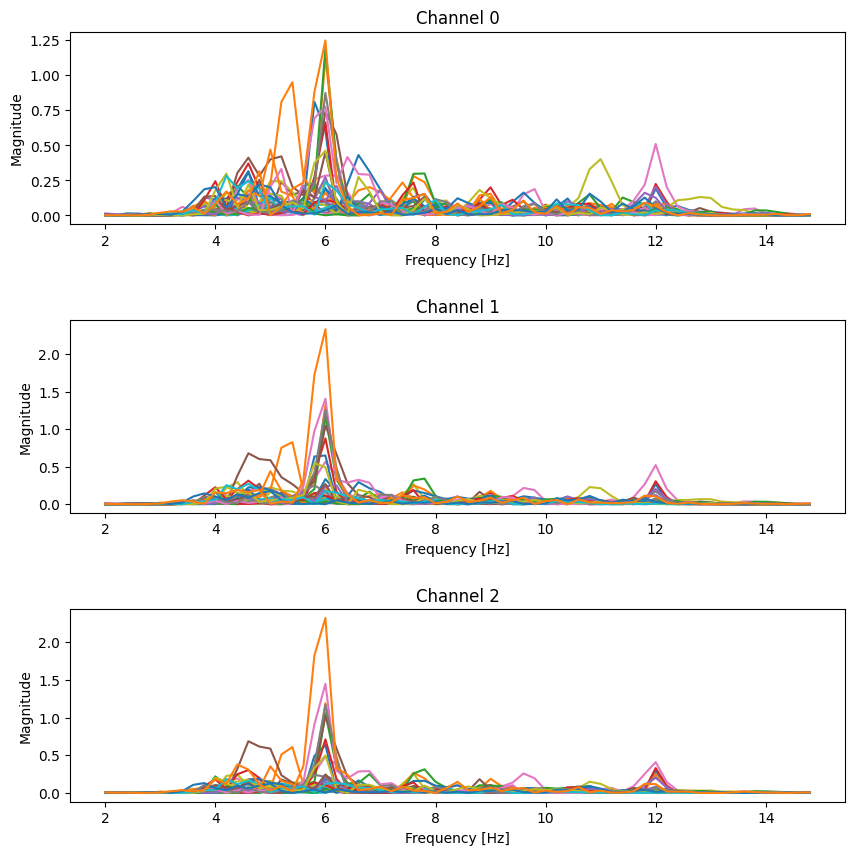

In [15]:
filenames = {f'../data/{day_text}/Pipo_6Hz.xdf'}

Xl, Fl, tl, yl = get_epoch(filenames)

FFT_CNN.fft_plot(Xl)

## **10 Hz**

## **18_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=52650
    Range : 0 ... 52649 =      0.000 ...   210.499 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)


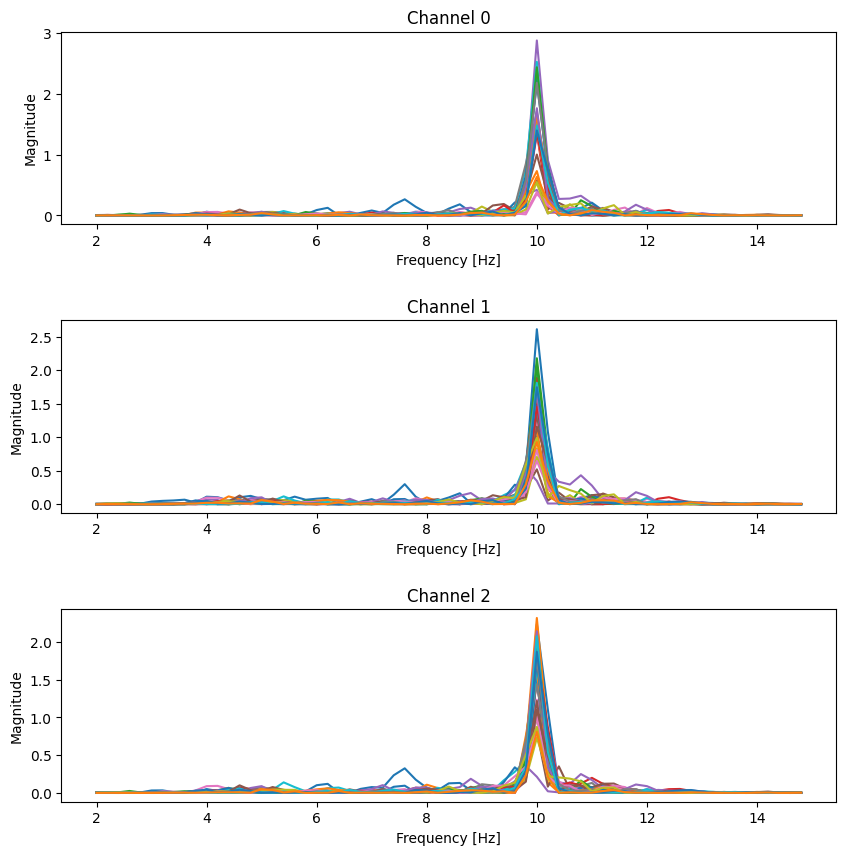

In [9]:
filenames = {'../data/18_5_2023/Pipo_10Hz.xdf'}

Xr, Fr, tr, yr = get_epoch(filenames)

FFT_CNN.fft_plot(Xr)

## **28_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=51800
    Range : 0 ... 51799 =      0.000 ...   207.071 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.023 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
1 bad epochs dropped
Effective window size : 1.023 (s)


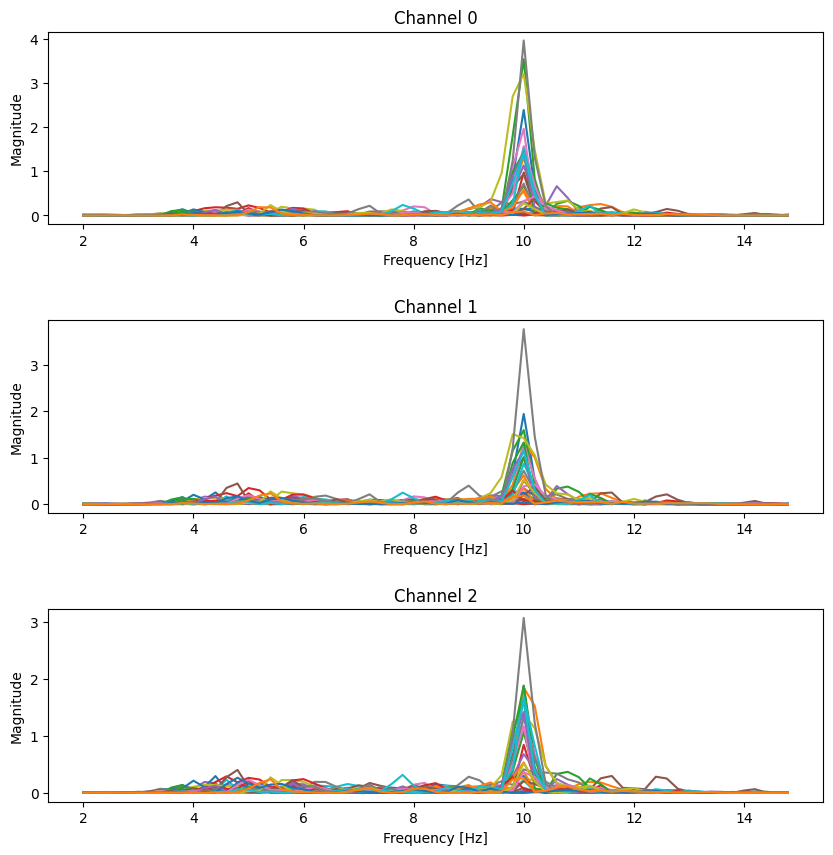

In [16]:
filenames = {'../data/28_5_2023/Pipo_10Hz.xdf'}

Xr, Fr, tr, yr = get_epoch(filenames)

FFT_CNN.fft_plot(Xr)

## **Unk**

## **18_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=49780
    Range : 0 ... 49779 =      0.000 ...   199.048 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)


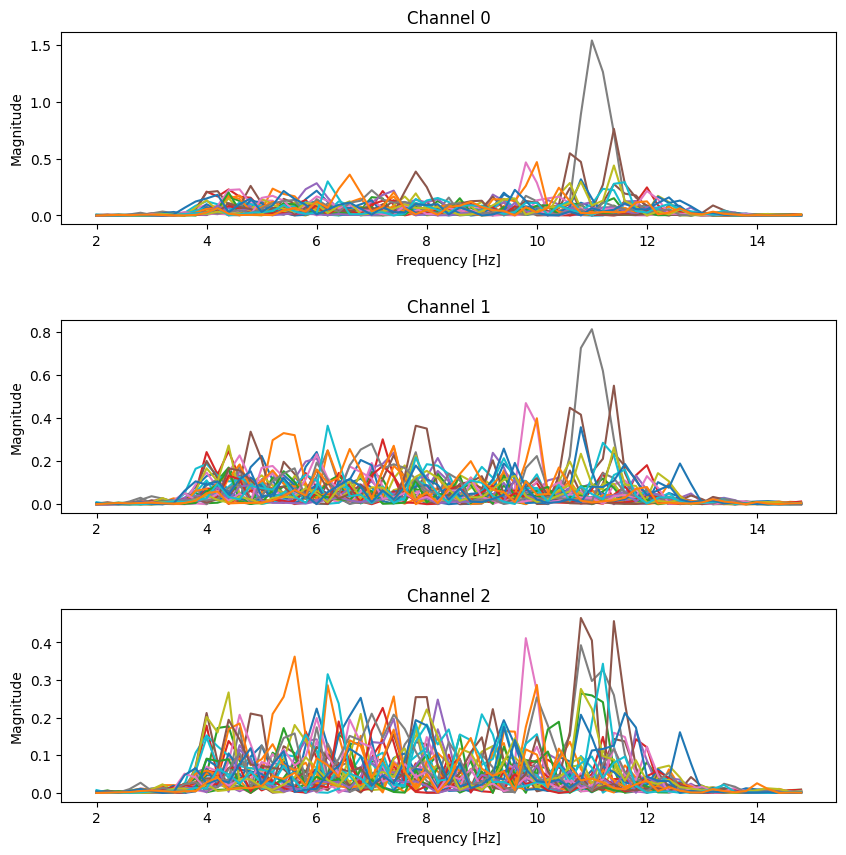

In [19]:
filenames = {'../data/18_5_2023/Pipo_unksignal_1.xdf'}

Xfs, Ffs, tfs, yfs = get_epoch(filenames)

FFT_CNN.fft_plot(Xfs)

## **28_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=50890
    Range : 0 ... 50889 =      0.000 ...   203.468 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)
Creating RawArray with float64 data, n_channels=8, n_times=51390
    Range : 0 ... 51389 =      0.000 ...   205.476 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying bas

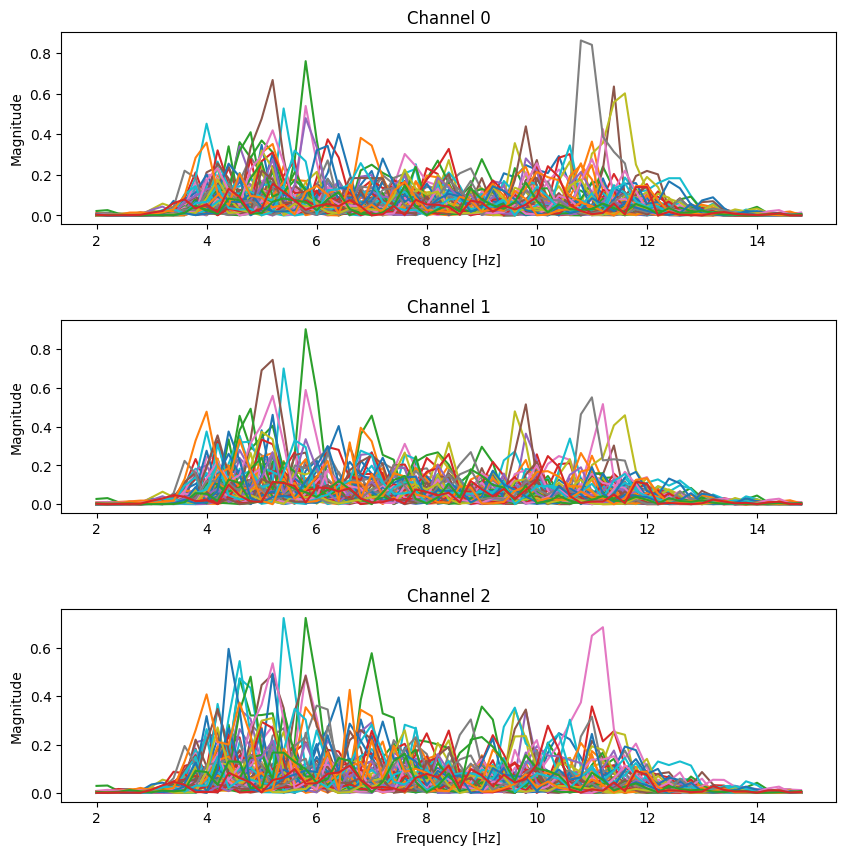

In [20]:
filenames = {'../data/28_5_2023/Pipo_unksignal_1.xdf', '../data/28_5_2023/Pipo_unksignal_2.xdf'}

Xfs, Ffs, tfs, yfs = get_epoch(filenames)

FFT_CNN.fft_plot(Xfs)

## **6 , 10 Hz**

## **18_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=50660
    Range : 0 ... 50659 =      0.000 ...   202.544 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s)
Creating RawArray with float64 data, n_channels=8, n_times=50270
    Range : 0 ... 50269 =      0.000 ...   201.005 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying bas

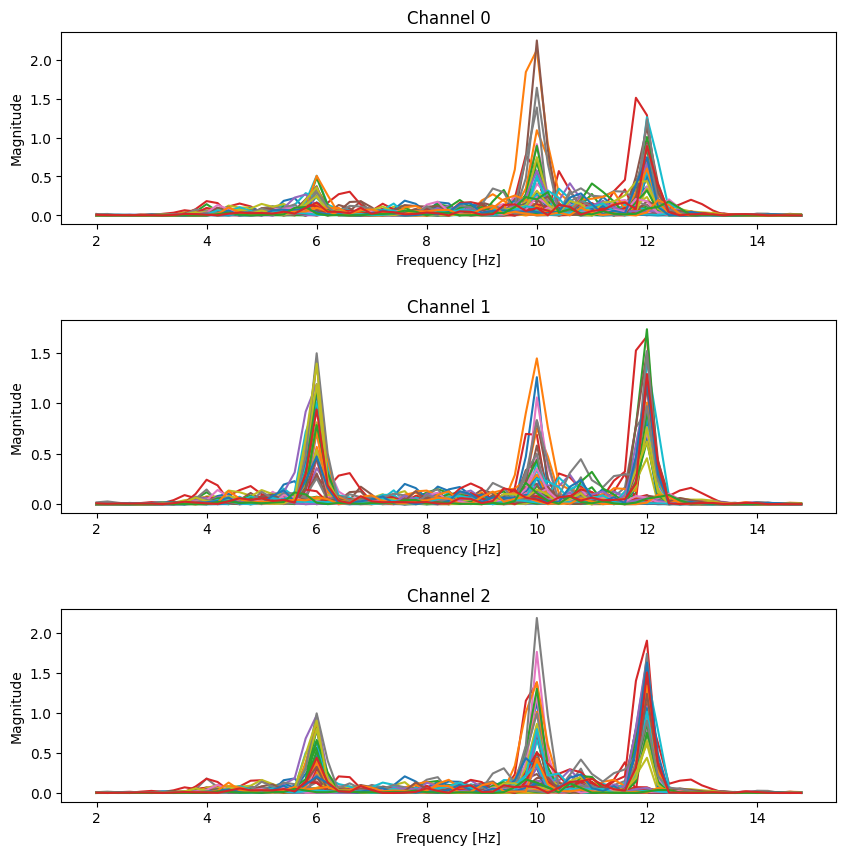

In [23]:
filenames = {'../data/18_5_2023/Pipo_normal_1.xdf', '../data/18_5_2023/Pipo_normal_2.xdf'}

Xm, Fm, tm, ym = get_epoch(filenames)

FFT_CNN.fft_plot(Xm)

## **28_5_2023**

Creating RawArray with float64 data, n_channels=8, n_times=51040
    Range : 0 ... 51039 =      0.000 ...   204.051 secs
Ready.
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
1 bad epochs dropped
Effective window size : 1.023 (s)
Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.023 (s)


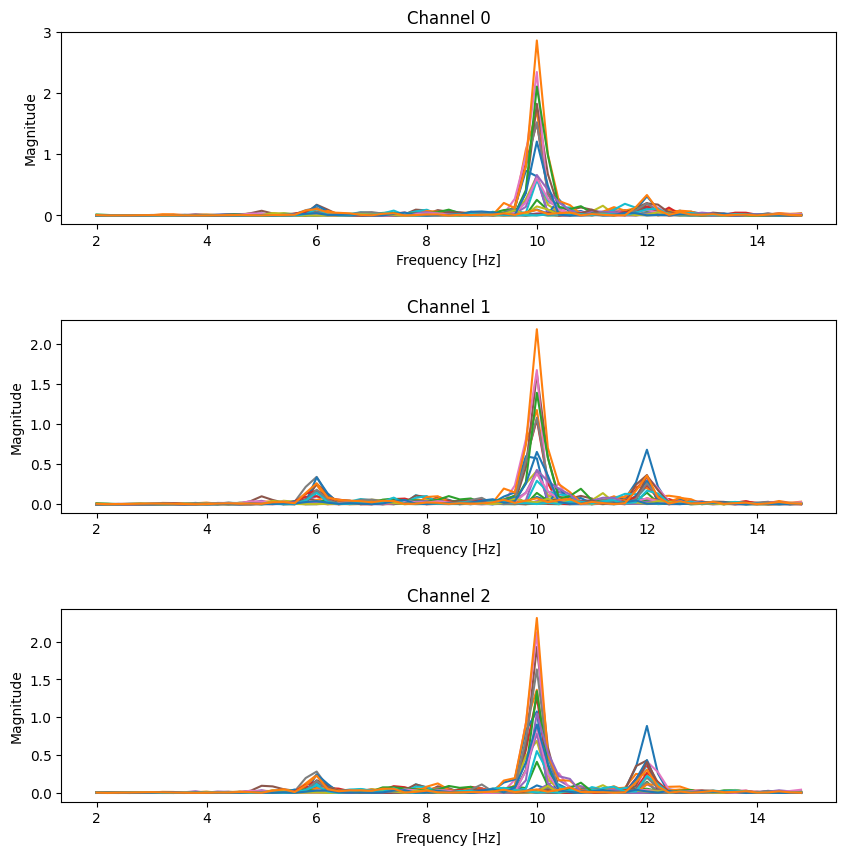

In [22]:
# filenames = {'../data/28_5_2023/Pipo_normal_1.xdf', '../data/28_5_2023/Pipo_normal_2.xdf'}

filenames = {'../data/28_5_2023/Pipo_normal_3.xdf'}

Xm, Fm, tm, ym = get_epoch(filenames)

FFT_CNN.fft_plot(Xm)

## **Concatenate Data**

In [12]:
X = np.concatenate([Xl, Xr, Xfs, Xm])
F = np.concatenate([Fl, Fr, Ffs, Fm])
t = np.concatenate([tl, tr, tfs, tm])
y = np.concatenate([yl, yr, yfs, ym])

X.shape, F.shape, t.shape, y.shape

((192, 3, 1250), (192, 3, 31), (15000,), (192,))

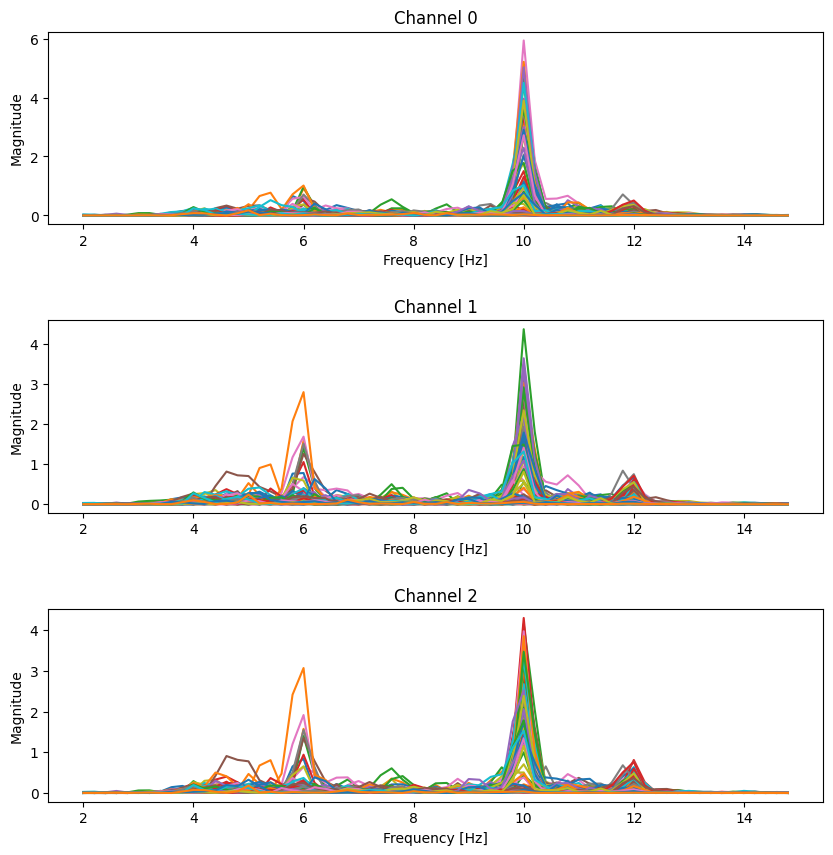

In [13]:
FFT_CNN.fft_plot(X)